In [1]:
import sys, os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

Global oldest review: 2007-11-01 00:00:00
Global newest review: 2023-11-20 00:00:00


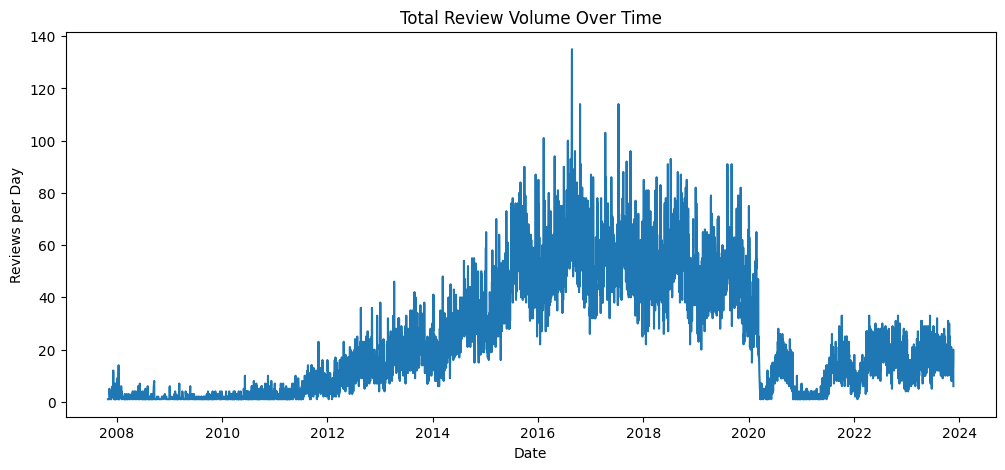

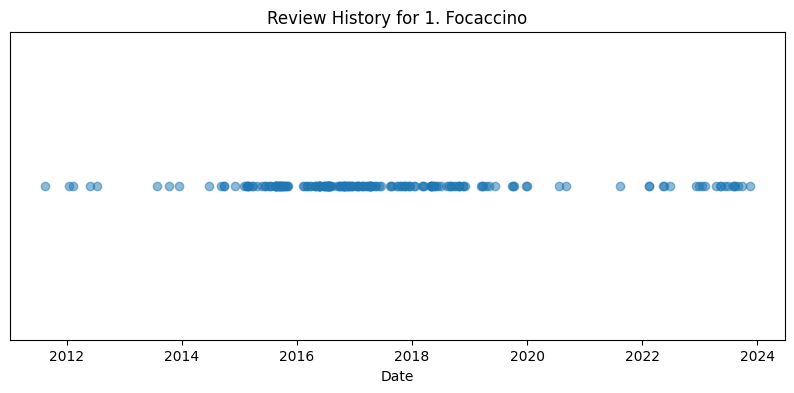

In [2]:
from src.preprocessing import (
    fix_stringified_date_lists, deduplicate_date_lists,
    add_date_features, add_review_count, add_review_period,
    extract_latest_review, extract_oldest_review,
    explode_dates, plot_review_trend, plot_review_history
)

df = pd.read_csv("../data/raw/berlin_reviews_2.csv")

# 1. Convert strings → lists
df = fix_stringified_date_lists(df, column="dates")

# 2. Remove duplicates
df = deduplicate_date_lists(df, column="dates")

# 3. Parse dates (turn strings into datetime)
df = add_date_features(df, date_column="dates")

# 4. Add analytics
df = add_review_count(df)
df = add_review_period(df)

# 5. Global stats
print("Global oldest review:", extract_oldest_review(df))
print("Global newest review:", extract_latest_review(df))

# 6. Plot global trends
plot_review_trend(df)

# 7. Plot one restaurant
plot_review_history(df, name_column="title", restaurant_name="1. Focaccino")


In [9]:
df.reviews[0]

'["The atmosphere is very classy yet cozy. The owner is gracious - represents Sicily well! The food and service were outstanding and I highly recommend it - Linguine with Calamari in it\'s own ink was fantastic! 3 courses and drinks for 2 (including the best...Grappa they had after dinner) were only $120 including tip - incredible value.More", \'Ricardo took excellent are of us last night. He picked our wine, which was perfectly paired with everyone’s dinner. The Risotto was simply amazing with black truffle and burrata. The lasagne was perfect and the spicy pizza was just the perfect. We will be back!\', \'Best copanata I ever had !! Every dish we ordered was cooked to perfection with tons of flavor!! The tiramisu was so delicious we ordered a second!! Place was full of locals and the staff was super welcoming ! A+++\', \'This is now our favorite restaurant in Berlin.  We loved everything about it!  The ambiance is great (welcoming and not touristy); the food is excellent (good pizza 